# Construct the hybrid graph representation of a 2D cartesian map

In [1]:
import sys
sys.path.append('../../')
from panav.env import NavigationEnv, Box2DRegion, box_2d_center
from panav.hybrid import HybridGraph
from panav.viz import draw_env,draw_hybrid


import numpy as np
from matplotlib import pyplot as plt




%load_ext autoreload
%autoreload 2

## Multi-tunnel environment

In [2]:


# 2D navigation environment
start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])


start_locs = np.array([[-5,1],[5,3],[-5,-1]])*1.5

goal_locs = np.array([[-2.5,-2.5],[-5,3],[5,-1]])*1.5



starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]

# O1 = Box2DRegion((-5.0,-0.5),(0.5,10))
# O2 = Box2DRegion((-0.0,5.0),(-10,-1.0))


O1 = Box2DRegion((-2.5,2.5),(0.5,10))
O2 = Box2DRegion((-2.5,2.5),(-3,-1.0))
O3 = Box2DRegion((-2.5,2.5),(-10.0,-4.0))

limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 

env = NavigationEnv(limits,[O1,O2,O3],starts,goals)


# Construct the hybrid graph representation of the environment

HG =  HybridGraph(env,bloating_r)


Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-18


/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


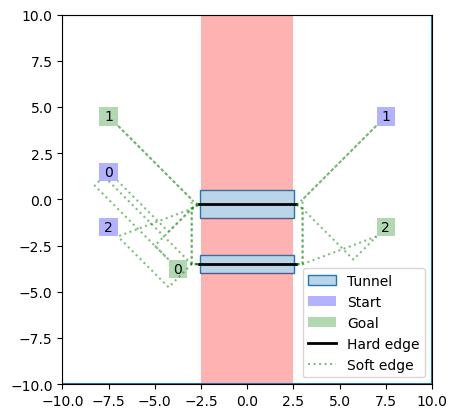

In [3]:
ax = plt.gca()
draw_hybrid(HG,ax)
plt.show()    

## Triangle obstacle environment

/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


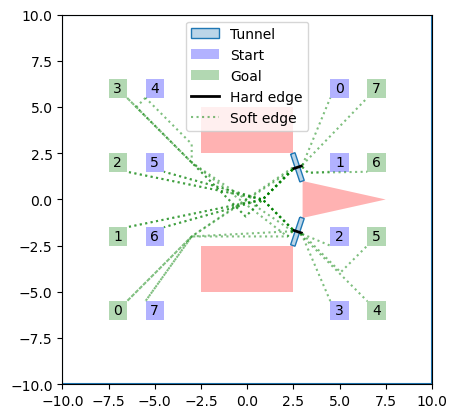

In [5]:
from panav.env import PolygonRegion


top, bottom = 6,-6
start_x_offset = 5 
goal_x_offset = 7
N = 4

start_locs = np.vstack([
np.vstack([np.ones(N)*start_x_offset,np.linspace(top,bottom, N)]).T,
np.vstack([np.ones(N)*(-start_x_offset),np.linspace(top,bottom, N)]).T])

goal_locs = np.vstack([
np.vstack([np.ones(N)*(-goal_x_offset),np.linspace(bottom,top, N)]).T,
np.vstack([np.ones(N)*goal_x_offset,np.linspace(bottom,top, N)]).T])

starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]



start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

o1 = Box2DRegion((-2.5,2.5),(2.5,5))
o2 = Box2DRegion((-2.5,2.5),(-5,-2.5))
o3 = PolygonRegion([(3.0,1.0),(3.0,-1.0),(7.5,0)])

obstacles = [o1,o2,o3]

limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 


env = NavigationEnv(limits,[o1,o2,o3],starts,goals)


# Construct the hybrid graph representation of the environment

HG =  HybridGraph(env,bloating_r)

ax = plt.gca()
draw_hybrid(HG,ax)
plt.show()    